<a href="https://colab.research.google.com/github/RozitaAbdoli/rule_based_ML_housing_data/blob/main/housing_pattern_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This python notebook includes:

 * Initial analysis: visualizations and insights about the dataset
 * Data cleaning and feature engineering
 * Association rule mining using the Frequent Pattern Growth Algorithm



---


**Variables Dictionary:**

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

In [ ]:
# Install and import required libraries
!pip install pyfpgrowth 
import pyfpgrowth
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Initial Analysis and Data Understanding

In [ ]:
# Uploading dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load csv into pandas DataFrame
# Source: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
df = pd.read_csv('/content/drive/MyDrive/CIND840_practical machine learning/melb_data.csv')

In [ ]:
# How many entries and variables does this dataset have?
df.shape

(13580, 21)

In [ ]:
# Look at the first three rows
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# obtain information i.e. columns, datatypes, memory footprint
df.info()
#Insight: date datatype is "object". Will convert to "datetime" if needed, but will leave as is for now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# compute summary statistics for numeric columns.
df.describe()
#Insight: Rooms and Bedrooms attributes have almost identical mean and std. Their 25 percentile, 50 percentile, and 75 percentile values are the same.

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df.duplicated().sum()
# No duplicate rows

0

In [ ]:
#Look for missing values
df.isnull().sum()
# 4 attributes: Car, BuildingArea, YearBuilt, CouncilArea have missing values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
#looking at the number of unique values for each variable (including numeric columns by converting to 'object').
df.astype('object').describe(include='all').loc['unique', :]
# One insight is there are 268 Real Estate agents in the dataset
# Another insight is that these data correspond to 58 unique days of sale in Melbourne, Australia

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
Name: unique, dtype: object

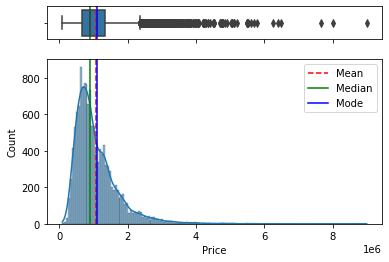

In [ ]:
#Look at the distribution of Price
# Box plot and histogram of the numeric attribute Price with vertical lines showing mean, median, and mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Price'].mean()
median=df['Price'].median()
mode=df['Price'].mode().values[0]

sns.boxplot(data=df, x='Price', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()
# Insight: Price seems skewed right with outliers at the high end. Therefore, mean (which is affected by outliers) is higher than median.

House         9449
Condo         3017
Town House    1114
Name: Type, dtype: int64

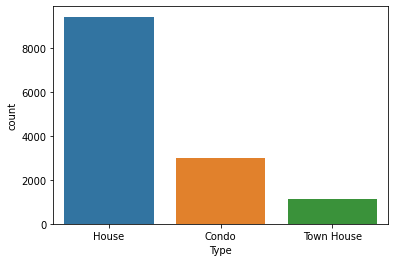

In [ ]:
df['Type'] = df['Type'].replace({'h':'House', 'u':'Condo', 't':'Town House'})
sns.countplot(x='Type', data=df);
df['Type'].value_counts()
#Insight: most of the properties sold (~70%) were houses followed by condo units, and town houses.

In [ ]:
(df == 0).sum(axis=0)
#Landsize has a lot of values that are zero. next, look at what property type do most of these zeros belong to?

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            6
Postcode            0
Bedroom2           16
Bathroom           34
Car              1026
Landsize         1939
BuildingArea       17
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df1 = df.groupby('Type').agg(lambda x: x.eq(0).sum())
df1['Landsize']
#Out of the 3017 condos, 1629 (about half) are listed as having a landsize of zero, but the other half have a non-zero value.
#Also there are houses and town houses with land size of zero. Therefore, it's possible that these zeros are missing values.

Type
Condo         1629.0
House          171.0
Town House     139.0
Name: Landsize, dtype: float64

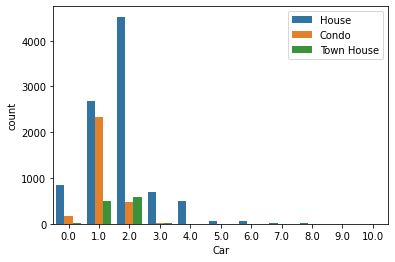

In [ ]:
#Look at the number of cars across different property types.
g = sns.countplot(x='Car',hue='Type', data=df);
g.legend(loc='upper right')
# Insights: Most houses have 2 cars. Most condos have 1 car. Town houses are approximately evenly split between 1 and 2 cars. 

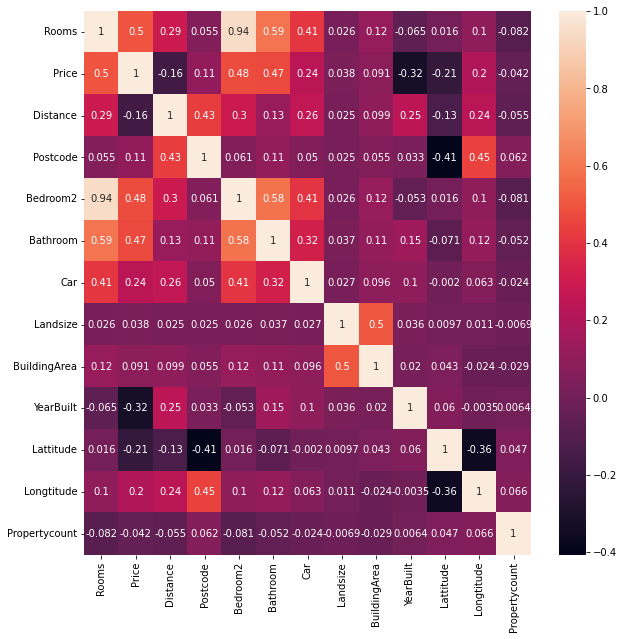

In [ ]:
#Heat map of the (pearson) correlations between numeric attributes
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # increase size of the heatmap, so the numbers show up correctly
sns.heatmap(corr_matrix, annot=True);
#Insights: Rooms and bedrooms have almost perfect positive linear correlation (pearson correlation=0.94). 
#Number of Bedrooms and bathrooms are corrleated (pearson correlation=0.58)
#BuildingArea and landsize are correlated (pearson correlation=0.5)

In [ ]:
#Pearson’s coefficient assumes that both variables are normally distributed. This requires they be truly continuous and unbounded. 
# But # of rooms and bedrooms are not truely continuous and unblounded. Therefore, try Spearman rank correlation too:
df['Rooms'].corr (df['Bedroom2'], method='spearman')
#spearman correlation = 0.96

0.9596678439485257

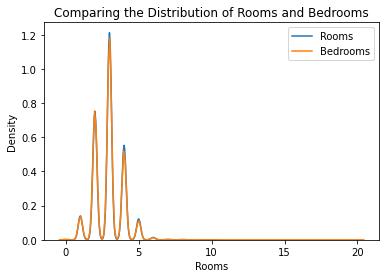

In [ ]:
# visualize the distributions of Rooms and Bedrooms 
sns.kdeplot(df['Rooms']);
sns.kdeplot(df['Bedroom2']);
plt.legend(["Rooms", "Bedrooms"])
plt.title('Comparing the Distribution of Rooms and Bedrooms')
plt.show()
#Insight: Can see that rooms and bedrooms have almost identical distributions

In [ ]:
#And looking at some of the unique values in the columns
df.apply(lambda col: ', '.join(map(str, col.unique())))

Suburb           Abbotsford, Airport West, Albert Park, Alphing...
Address          85 Turner St, 25 Bloomburg St, 5 Charles St, 4...
Rooms                                   2, 3, 4, 1, 6, 5, 8, 7, 10
Type                                      House, Condo, Town House
Price            1480000.0, 1035000.0, 1465000.0, 850000.0, 160...
Method                                           S, SP, PI, VB, SA
SellerG          Biggin, Nelson, Jellis, Greg, LITTLE, Collins,...
Date             3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 7/...
Distance         2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11....
Postcode         3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025.0...
Bedroom2         2.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 8.0, 9.0, 7...
Bathroom               1.0, 2.0, 3.0, 4.0, 0.0, 7.0, 5.0, 6.0, 8.0
Car              1.0, 0.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0, 7.0, 9...
Landsize         202.0, 156.0, 134.0, 94.0, 120.0, 181.0, 245.0...
BuildingArea     nan, 79.0, 150.0, 142.0, 210.0, 107.0, 75.0, 

# Data Cleaning and Feature Engineering
Creating a copy (df2) where data cleaning and feature engineering are performed.

In [ ]:
df2 = df.copy(deep=True)        #deep copy includes a copy of the data and the indices

In [ ]:
# Remove the 62 rows where the "Car" attribute has a missing value
df2 = df2.dropna(axis=0, subset=['Car'])

In [ ]:
#Convert 'Price' in Australian Dollars to bins
bins = [0.0, 200000.0, 500000.0, 1000000.0, 2000000.0, 4000000.0, 10000000.0]
labels = ['<200K', '200K-500K', '500K-1Mill', '1Mill-2Mill', '2Mill-4Mill', '>4Mill']
df2['Price'] = pd.cut(df2['Price'], bins=bins, labels=labels, include_lowest=True)
df2.Price.unique()

['1Mill-2Mill', '500K-1Mill', '200K-500K', '2Mill-4Mill', '>4Mill', '<200K']
Categories (6, object): ['<200K' < '200K-500K' < '500K-1Mill' < '1Mill-2Mill' < '2Mill-4Mill' <
                         '>4Mill']

In [ ]:
#Convert 'Distance' in kilometers from central business district to bins
bins = [0.0, 10.0, 20.0, 30.0, 50.0]
labels = ['Downtown', 'Midtown', 'Uptown', 'Suburb']
df2['Distance'] = pd.cut(df2['Distance'], bins=bins, labels=labels, include_lowest=True)
df2.Distance.unique()

['Downtown', 'Midtown', 'Uptown', 'Suburb']
Categories (4, object): ['Downtown' < 'Midtown' < 'Uptown' < 'Suburb']

In [ ]:
# Convert all the columns datatypes to string (they're now the same type and can be fed to pyfpgrowth for finding frequent patterns)
df2= df2.astype('str')

In [ ]:
# Renaming some of the columns so it's easier to understand association rules
df2['Method'] = df2['Method'].replace({ 'S': 'property sold', 'SP': 'property sold prior', 'PI': 'property passed in', 'VB': 'vendor bid', 'SA': 'sold after auction'})
df2['Bedroom2'] = df2['Bedroom2'].replace({'0.0': 'no_bedrooms', '1.0': '1_bedroom', '2.0': '2_bedrooms', '3.0': '3_bedrooms', '4.0': '4_bedrooms', '5.0': '5_bedrooms' , '6.0': '6_bedrooms', '7.0': '7_bedrooms', '8.0': '8_bedrooms', '9.0': '9_bedrooms',  '10.0': '10_bedrooms',  '20.0': '20_bedooms' })
df2['Bathroom'] = df2['Bathroom'].replace({'0.0': 'no_bathrooms', '1.0': '1_bathroom', '2.0': '2_bathrooms', '3.0': '3_bathrooms', '4.0': '4_bathrooms', '5.0': '5_bathrooms' , '6.0': '6_bathrooms', '7.0': '7_bathrooms', '8.0': '8_bathrooms'})
df2['Car'] = df2['Car'].replace({'0.0': 'no_cars', '1.0': '1_car', '2.0': '2_cars', '3.0': '3_cars', '4.0': '4_cars', '5.0': '5_cars' , '6.0': '6_cars', '7.0': '7_cars', '8.0': '8_cars', '9.0': '9_cars', '10.0': '10_cars'})


In [ ]:
# # # From the Date column, remove the day since we are only interested in the year and month the property was sold.
# convert dd/mm/yyyy -> mm/yyyy
df2['Date'] = df2['Date'].str[3:]

In [ ]:
#Add postalCode to the beginning of postal codes so it is more clear they are postal codes in the association rules
df2['Postcode'] = df2['Postcode'].apply(lambda x: "{}{}".format('postalCode', x))

In [ ]:
#remove Address, Lattitude, Longitude: half of the values or more are unique values. Not likely to produce meaningful association rules.
#remove BuildingArea, YearBuilt, CouncilArea: more than a 1000 missing values.
#remove Landsize (~2000 zeros). Half of the condos have a landsize of zero, and the other half don't. Also some of the houses and town houses have a land size of zero.
#remove Propertycount: It is the number of properties in any given suburb. Therefore, keep Suburb and remove this one.
#remove Rooms and keep Bedrooms as they contain almost identical data (see previous section).
df2 = df2.drop(['Address', 'Lattitude', 'Longtitude','BuildingArea','YearBuilt', 'CouncilArea', 'Landsize','Propertycount','Rooms'], axis=1)

In [ ]:
df2.shape
#We are left with 12 columns, and 13,518 rows to mine association rules.

(13518, 12)

In [ ]:
# Now take a final look at the variables that are going to be used for association rule mining
df2.apply(lambda col: ', '.join(map(str, col.unique())))

Suburb        Abbotsford, Airport West, Albert Park, Alphing...
Type                                   House, Condo, Town House
Price         1Mill-2Mill, 500K-1Mill, 200K-500K, 2Mill-4Mil...
Method        property sold, property sold prior, property p...
SellerG       Biggin, Nelson, Jellis, Greg, LITTLE, Collins,...
Date          2/2016, 3/2017, 6/2016, 5/2016, 0/2016, 11/201...
Distance                      Downtown, Midtown, Uptown, Suburb
Postcode      postalCode3067.0, postalCode3042.0, postalCode...
Bedroom2      2_bedrooms, 3_bedrooms, 4_bedrooms, 1_bedroom,...
Bathroom      1_bathroom, 2_bathrooms, 3_bathrooms, 4_bathro...
Car           1_car, no_cars, 2_cars, 6_cars, 5_cars, 4_cars...
Regionname    Northern Metropolitan, Western Metropolitan, S...
dtype: object

# EDA: Association Rule Mining using Frequent Pattern Growth Algorithm
* An association rule has the form LHS (left-hand side) => RHS (right-hand side)
* LHS U RHS is called an itemset
* The **"support"** or prevalence of the rule is the frequency of occurence of an itemset in a dataset/database for it to be considered a "frequent itemset" or a "frequent pattern".
* The **"confidence"** or strength of the rule = support(LHS U RHS)/support(LHS). Or the probability that the items in RHS will occur given
that the items in LHS have occured. 
* Here, support threshold is set at 200, and confidence threshold is set at 0.8.


In [ ]:
# Convert df2 to list of lists, and look at the first 2 lists (first 2 rows)
df2_list = df2.values.tolist()
print(df2_list[0:2])

[['Abbotsford', 'House', '1Mill-2Mill', 'property sold', 'Biggin', '2/2016', 'Downtown', 'postalCode3067.0', '2_bedrooms', '1_bathroom', '1_car', 'Northern Metropolitan'], ['Abbotsford', 'House', '1Mill-2Mill', 'property sold', 'Biggin', '2/2016', 'Downtown', 'postalCode3067.0', '2_bedrooms', '1_bathroom', 'no_cars', 'Northern Metropolitan']]


In [ ]:
# Finding frequent patterns:
patterns = pyfpgrowth.find_frequent_patterns(df2_list, support_threshold = 200)    

In [ ]:
# Generating association rules (LHS => RHS):
rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold = 0.8)

**Some interesting association rules picked from the association rules below:**


* ['Suburb'] --> ['House'] 0.9481132075471698

~95% of the properties sold in the suburb (>50km from central business
district) were houses (as opposed to condos or town houses).**


* ['South-Eastern Metropolitan', 'property sold'] --> ['House'] 0.8463855421686747

~85% of the properties sold in the South-Eastern Metropolitan region were detached houses.


* ['1_bathroom', '1_bedroom', '1_car', 'Condo', 'Southern Metropolitan'] --> ['200K-500K'] 0.8428571428571429

~84% of condos with 1-bedroom, 1-bathroom, and 1-car in the Southern Metropolitan region were sold between 200K and 500K.


* ['1_bathroom', '1_car', '2_bedrooms', 'Condo', 'Downtown', 'Southern Metropolitan', 'property sold'] --> ['500K-1Mill'] 0.8871473354231975

~89% of condos with 2-bedrooms, 1-bathroom, 1-car in the Southern Metropolitan region (Downtown) were sold between 500K-1Mill.


* ['1_bathroom', '3_bedrooms', 'House', 'Southern Metropolitan', 'property sold'] --> ['1Mill-2Mill'] 0.8166666666666667

~82% of houses with 3-bedrooms, and 1-bathroom in the Southern Metropolitan region were sold between 1Mill-2 Million Australian Dollars.


* ['1_bathroom', '3_bedrooms', 'House', 'Midtown', 'Northern Metropolitan', 'property sold'] --> ['500K-1Mill'] 0.88268156424581

~88% of houses with 3-bedrooms, and 1-bathroom in the Northern Metropolitan region (Midtown) were sold between 500K-1Mill.

In [ ]:
# Now to make the outputted rules look nicer:
for antecedents, consequents in rules.items():          #for keys, values in dictionary.items():
    antec_list =[]
    conseq_list =[]
    for a in antecedents:
        antec_list.append(a)
    for c in consequents[0]:
        conseq_list.append(c)
    print(antec_list, '-->', conseq_list, consequents[1])  


['Suburb'] --> ['House'] 0.9481132075471698
['Sweeney'] --> ['Western Metropolitan'] 0.9953703703703703
['Essendon'] --> ['Downtown', 'Western Metropolitan', 'postalCode3040.0'] 1.0
['Essendon', 'Western Metropolitan'] --> ['Downtown', 'postalCode3040.0'] 1.0
['Essendon', 'postalCode3040.0'] --> ['Downtown', 'Western Metropolitan'] 1.0
['Downtown', 'Essendon'] --> ['Western Metropolitan', 'postalCode3040.0'] 1.0
['Downtown', 'Essendon', 'Western Metropolitan'] --> ['postalCode3040.0'] 1.0
['Downtown', 'Essendon', 'postalCode3040.0'] --> ['Western Metropolitan'] 1.0
['Essendon', 'Western Metropolitan', 'postalCode3040.0'] --> ['Downtown'] 1.0
['Brunswick'] --> ['Downtown', 'Northern Metropolitan', 'postalCode3056.0'] 1.0
['Brunswick', 'Downtown'] --> ['Northern Metropolitan', 'postalCode3056.0'] 1.0
['Brunswick', 'Northern Metropolitan'] --> ['Downtown', 'postalCode3056.0'] 1.0
['postalCode3056.0'] --> ['Brunswick', 'Downtown', 'Northern Metropolitan'] 1.0
['Brunswick', 'postalCode3056.